In [20]:
require('cowplot')
library('ggplot2')
source('get_expected_pval_and_equiv_z.R')
source('multiplot.R')
source('plot_lib.R')
theme_set(theme_gray()) # switch to default ggplot2 theme for good

In [21]:
allsimudat_n50 <- load_data_from_csv('^test1_k025_n50_btw1_.*')


[1] "pattern= test1_k025_n50_btw1_"
[1] "CSV file /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025_n50_btw1_.csv  not found, reprocessing the data."
[1] "^test1_k025_n50_btw1_.*"
[1] "24 simulations"
[1] "Reading  24  /  24"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n50_btw1_wthdiff_nominal/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025_n50_btw1_.csv"
[1] "Reading  23  /  24"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n50_btw1_wthdiff_datascl_soft50_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025_n50_btw1_.csv"
[1] "Reading  22  /  24"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n50_btw1_wthdiff_datascl_soft20_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025

In [25]:
allsimudat_n20 <- load_data_from_csv('^test1_k025_btw1_.*')


[1] "pattern= test1_k025_btw1_"
[1] "CSV file /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025_btw1_.csv  not found, reprocessing the data."
[1] "^test1_k025_btw1_.*"
[1] "24 simulations"
[1] "Reading  24  /  24"
[1] "/Volumes/camille/IBMA_simu//test1_k025_btw1_wthdiff_nominal/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025_btw1_.csv"
[1] "Reading  23  /  24"
[1] "/Volumes/camille/IBMA_simu//test1_k025_btw1_wthdiff_datascl_soft50_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025_btw1_.csv"
[1] "Reading  22  /  24"
[1] "/Volumes/camille/IBMA_simu//test1_k025_btw1_wthdiff_datascl_soft20_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/Scripts/simulations/lib/../../../data/allsimudat_test1_k025_btw1_.csv"
[1] "Reading  21  / 

In [26]:
names(allsimudat_n50)
names(allsimudat_n20)

[1] "methods"       "glm"           "nStudies"      "nSubjects"    
 [5] "Between"       "Within"        "nSubjectsSame" "WithinSame"   
 [9] "unitMism"      "soft2"         "soft2Factor"   "nSimu"        
[13] "minuslog10P"   "P"             "rankP"         "expectedP"    
[17] "lnp"           "equivz"        "allgroups"     "expectedz"    
[21] "p_upper"       "z_upper"       "p_lower"       "z_lower"

[1] "methods"       "glm"           "nStudies"      "nSubjects"    
 [5] "Between"       "Within"        "nSubjectsSame" "WithinSame"   
 [9] "unitMism"      "soft2"         "soft2Factor"   "nSimu"        
[13] "minuslog10P"   "P"             "rankP"         "expectedP"    
[17] "lnp"           "equivz"        "allgroups"     "expectedz"    
[21] "p_upper"       "z_upper"       "p_lower"       "z_lower"

In [27]:
allsimudat <- rbind(allsimudat_n50, allsimudat_n20)

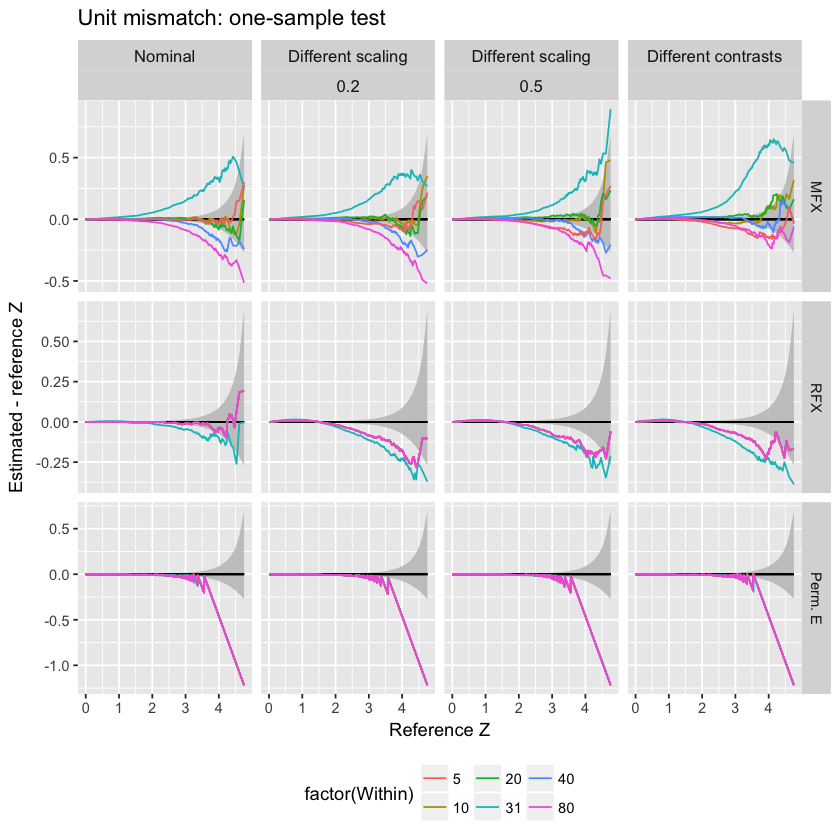

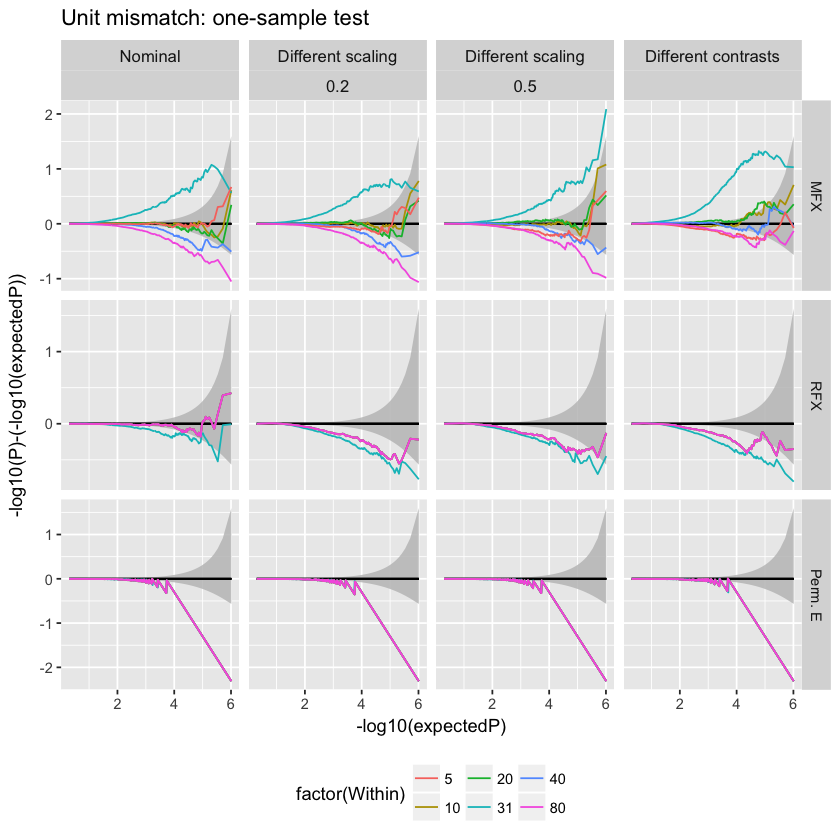

In [32]:
source('plot_lib.R')
source('prepare_data.R')
source('plot_unit_mismatch.R')
source('plot_blandaldman_z.R')
source('plot_grid_methods_color_within.R')
source('plot_qq_p.R')

con_methods <- c("megaMFX","megaRFX","permutCon", "megaFFX_FSL")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX"))  | 
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & nStudies==25)

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)


# Note for RFX we only keep btw=1 for display purposes (results with btw=0 are very similar)
# Also we only keep z>4.5 (to avoid very variable tail affecting ylim)
plot_unit_mismatch(
    subset(best_con_data_1_n20, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
    'one-sample test', mult=FALSE, single=TRUE, lim=NA, 
    filename=file.path("..", "..", "..", "..", "zmeta_paper", "figures", "unitmimatch_test1"), max_z=18)

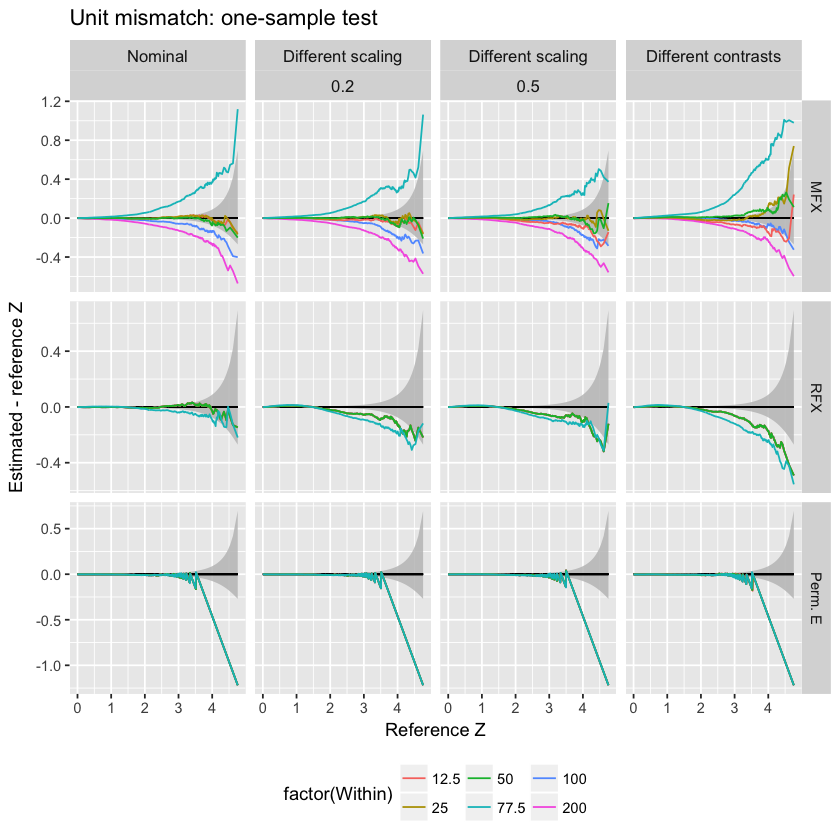

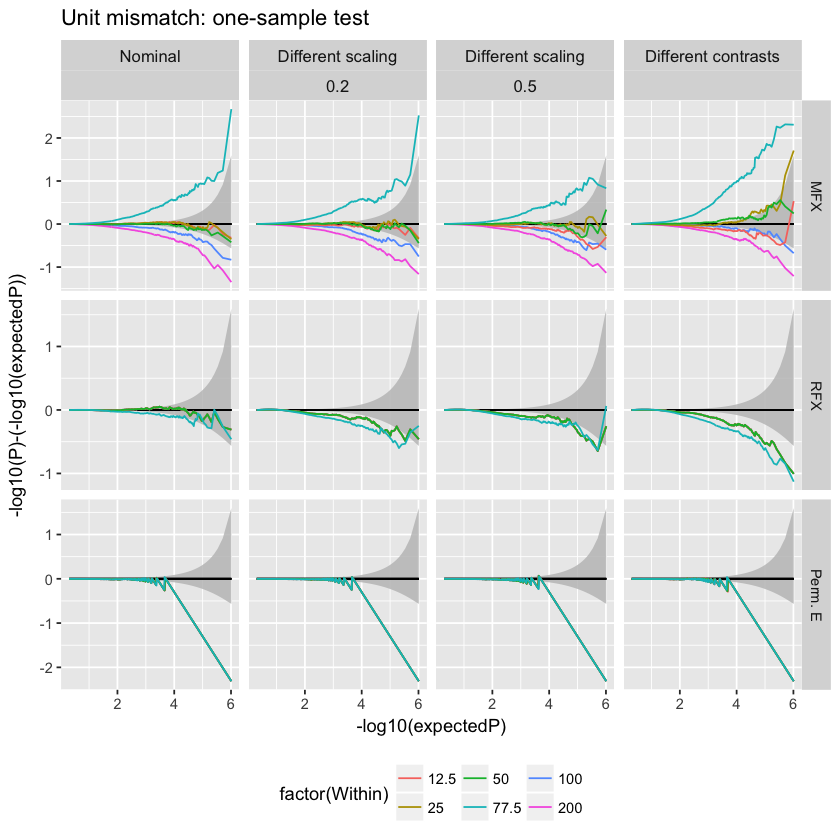

In [33]:
plot_unit_mismatch(
    subset(best_con_data_1_n50, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
    'one-sample test', mult=FALSE, single=TRUE, lim=NA, 
    filename=file.path("..", "..", "..", "..", "zmeta_paper", "figures", "unitmimatch_test1"), max_z=18)